* 데이터 수집       
http://data.seoul.go.kr/dataList/OA-1170/S/1/datasetView.do

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 수집

## 데이터프레임 생성
* csv 파일을 데이터프레임으로 만들기
* encoding='cp949'

In [3]:
df = pd.read_csv('test_data//생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949')

In [4]:
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


## 결측치 확인

In [5]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

## 자료형 확인

In [6]:
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

# 데이터 확인

## 컬럼별 데이터 확인

In [7]:
df.head(2)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24


## 시장/마트 목록

In [10]:
# 시장/마트 목록
len(df['시장/마트 이름'].unique())  # df['시장/마트 이름'].nunique()

102

In [12]:
# 시장/마트 목록
df['시장/마트 이름'].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [14]:
# 시장/마트 목록
df_market = df[['시장/마트 번호', '시장/마트 이름' , '자치구 이름',
                '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [15]:
# 자치구 별 시장/마트 갯수
df_market['자치구 이름'].value_counts()

자치구 이름
중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: count, dtype: int64

In [18]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름']=='서대문구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
13,32,영천시장,서대문구,전통시장
119,31,인왕시장,서대문구,전통시장
457,33,현대백화점 신촌점,서대문구,대형마트
4309,220,롯데슈퍼,서대문구,대형마트


## 품목 목록

In [19]:
# 품목 목록
df_item = df[['품목 번호', '품목 이름']].drop_duplicates()
df_item = df_item.sort_values('품목 이름')

In [21]:
# 품목 이름 (30개씩 확인) 총 81개임
df_item[:30]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


In [22]:
df_item[30:60]

,품목 번호,품목 이름
2457,265,"명태(생물,수입산)"
1019,184,"명태(일본산,냉동)"
79,25,무
103,308,무(1kg)
0,133,무(세척무)
33,282,무(세척무)
2432,274,"무(세척무, 중)"
157,27,배
56,276,배(신고)
4268,248,"배(신고),중급(대)"


In [23]:
df_item[60:]

,품목 번호,품목 이름
10,309,양파(1.5kg망)
2191,272,양파(작은망)
5,22,오이
21,311,오이(다다기)
31,253,오징어
2620,54,오징어(냉동)
441,256,"오징어(냉동,국산)"
6813,257,"오징어(냉동,수입산)"
36,254,"오징어(생물,국산)"
2567,255,"오징어(생물,수입산)"


## 자치구 목록

In [24]:
df_gu = df[['자치구 코드', '자치구 이름']].drop_duplicates()
df_gu.shape

(25, 2)

## 시장 유형

In [25]:
df_gubun = df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()
df_gubun

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


# 삼겹살 가격 분석

## 삼겹살 데이터
* 특정 문자열이 포함되어있는지 확인 : .str.contains(문자열)

In [32]:
# 조건 = 품목이름 삼겹살이면서 2021-06 이면서 실판매규격 600g 
# 2021-06 데이터 이용
df_sam = df[(df['품목 이름'].str.contains('삼겹살')) &
            (df['년도-월'] == '2021-06') &
            (df['실판매규격'].str.contains('600g'))]
df_sam

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [33]:
df_sam.shape

(224, 14)

In [34]:
# 삼겹살 600g의 평균 가격은?
df_sam['가격(원)'].mean()

16842.723214285714

In [35]:
# 삼겹살 600g의 최고 가격은?
df_sam['가격(원)'].max()

35890

In [36]:
df_sam[df_sam['가격(원)']==35890]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4043,1668108,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24
4064,1674531,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24


In [37]:
# 삼겹살 600g의 최저 가격은?
df_sam['가격(원)'].min()

1690

In [38]:
df_sam[df_sam['가격(원)']==1690]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


## 우리동네 삼겹살 가격

In [39]:
gu  = input('구이름 :  ')

구이름 :   관악구


In [42]:
# 우리구 삼겹살 가격
df_sam_gu = df_sam[df_sam['자치구 이름'] == gu][['시장/마트 이름' , 
                                                '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_sam_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
2879,원당종합시장,돼지고기(생삼겹살),600g,14800
2889,원당종합시장,돼지고기(생삼겹살),600g,15800
2978,신원시장(신림1동),돼지고기(생삼겹살),600g,16000
3212,롯데백화점 관악점,돼지고기(생삼겹살),600g,22800
3231,롯데백화점 관악점,돼지고기(생삼겹살),600g,14400
3383,세이브 마트,돼지고기(생삼겹살),600g,13800
5503,관악신사시장(신림4동),돼지고기(생삼겹살),600g,14000


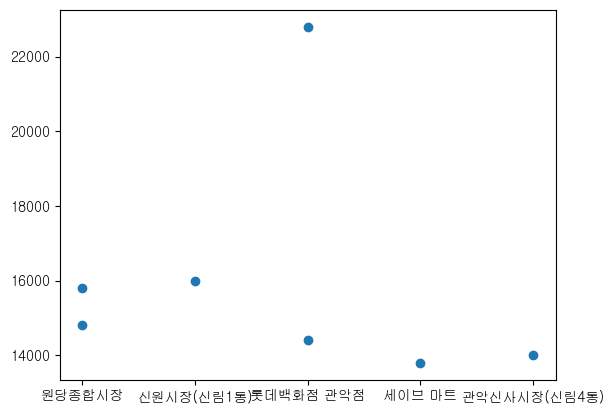

In [43]:
# 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']
plt.scatter(x, y)
plt.show()

## 마트 지점별 삼겹살 가격

In [44]:
mart = input('시장/마트이름 : ') # 입력은 백화점

시장/마트이름 :  백화점


In [45]:
# 마트 지점별 삼겹살 가격
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)][['시장/마트 이름' , 
                                                '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_sam_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
22,현대백화점 미아점,돼지고기(생삼겹살),"600g (100g 4,280원)",25680
47,롯데백화점 노원점,돼지고기(생삼겹살),600g,26940
457,현대백화점 신촌점,돼지고기(생삼겹살),600g(1등급),25700
2576,태평백화점,돼지고기(생삼겹살),600g,21360
2617,태평백화점,돼지고기(생삼겹살),600g,19000
2661,태평백화점,돼지고기(생삼겹살),600g,23760
2681,태평백화점,돼지고기(생삼겹살),600g,20160
2751,롯데백화점 영등포점,돼지고기(생삼겹살),600g,27480
2989,롯데백화점 미아점,돼지고기(생삼겹살),600g,15760
3013,롯데백화점 미아점,돼지고기(생삼겹살),600g,20160


In [48]:
len(df_sam_mart)

15

In [66]:
z = df_sam_mart.set_index(['시장/마트 이름'])
z

,품목 이름,실판매규격,가격(원)
시장/마트 이름,,,
현대백화점 미아점,돼지고기(생삼겹살),"600g (100g 4,280원)",25680
롯데백화점 노원점,돼지고기(생삼겹살),600g,26940
현대백화점 신촌점,돼지고기(생삼겹살),600g(1등급),25700
태평백화점,돼지고기(생삼겹살),600g,21360
태평백화점,돼지고기(생삼겹살),600g,19000
태평백화점,돼지고기(생삼겹살),600g,23760
태평백화점,돼지고기(생삼겹살),600g,20160
롯데백화점 영등포점,돼지고기(생삼겹살),600g,27480
롯데백화점 미아점,돼지고기(생삼겹살),600g,15760


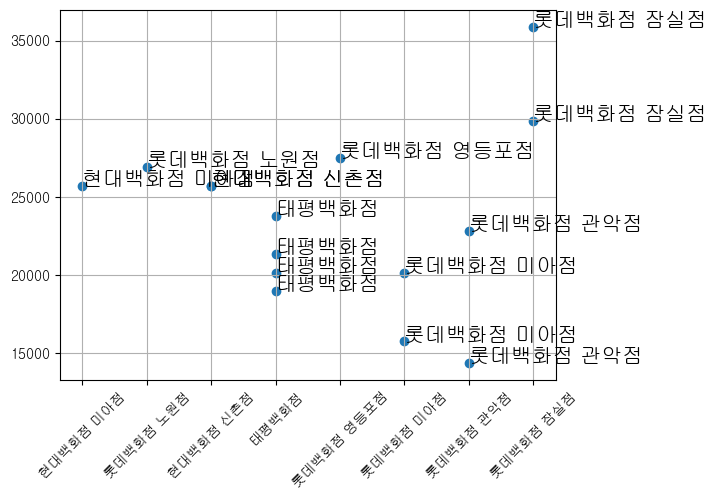

In [68]:
# 시각화
x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']
plt.scatter(x, y)
for i in range(15):
    plt.text(x.iloc[i], y.iloc[i],z.index[i], fontsize = 15)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 달걀 가격 분석

## 달걀 데이터

In [69]:
# 2021-06 데이터 이용
df_egg_2106 = df[(df['년도-월'] == '2021-06') & (df['품목 이름'].str.contains('달걀'))]
df_egg_2106

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
26,1668433,16,현대백화점 미아점,171,달걀(10개),10개,6000,2021-06,하람드림특란,2,대형마트,290000,성북구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6774,1674902,16,현대백화점 미아점,171,달걀(10개),10개 (600g),6000,2021-06,하람드림특란,2,대형마트,290000,성북구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [70]:
# 달걀 30구 평균 가격
df_egg_2106['품목 이름'].unique()

array(['달걀(10개)', '달걀(30개)', '달걀', '달걀(15개)', '달걀(왕란)'], dtype=object)

In [71]:
df_egg_2106[df_egg_2106['품목 이름'] == '달걀']

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
768,1671503,110,이마트 신도림점,17,달걀,특란1750g,6900,2021-06,국내산알찬란,2,대형마트,530000,구로구,2021-06-24
858,1674178,110,이마트 신도림점,17,달걀,25개(1300g),7980,2021-06,"국내산,대란",2,대형마트,530000,구로구,2021-06-24
906,1669398,110,이마트 신도림점,17,달걀,25개(1300g),7980,2021-06,"국내산,대란",2,대형마트,530000,구로구,2021-06-24
1237,1671282,33,현대백화점 신촌점,17,달걀,15개(특란) 900g,10500,2021-06,텃골 1등급란,2,대형마트,410000,서대문구,2021-06-24
5543,1673906,33,현대백화점 신촌점,17,달걀,15개(900g),10500,2021-06,동물복지순백란,2,대형마트,410000,서대문구,2021-06-24
5553,1669262,33,현대백화점 신촌점,17,달걀,15개(900g),10500,2021-06,동물복지순백유정란,2,대형마트,410000,서대문구,2021-06-24
5704,1667492,33,현대백화점 신촌점,17,달걀,15개(특란) 900g,10500,2021-06,텃골 1등급 우정란,2,대형마트,410000,서대문구,2021-06-24
6619,1667789,227,NC백화점 신구로점,17,달걀,특란1750g,6900,2021-06,국내산,2,대형마트,530000,구로구,2021-06-24
6620,1667788,227,NC백화점 신구로점,17,달걀,특란600g,3000,2021-06,국내산,2,대형마트,530000,구로구,2021-06-24
6633,1669414,227,NC백화점 신구로점,17,달걀,10개(600g),4590,2021-06,"국내산,특란",2,대형마트,530000,구로구,2021-06-24


In [72]:
df_egg_2106[df_egg_2106['품목 이름'] == '달걀(왕란)']

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
5280,1668177,205,둔촌역전통시장,181,달걀(왕란),1마리(1.5kg),8000,2021-06,국내산,1,전통시장,740000,강동구,2021-06-24


In [74]:
df_egg_2106 = df_egg_2106[(df_egg_2106['품목 이름'].str.contains('30개')) | 
                            (df_egg_2106['실판매규격'].str.contains('30개'))].drop_duplicates()
df_egg_2106

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [75]:
df_egg_2106.shape

(388, 14)

In [76]:
# 달걀 최고 가격
df_egg_2106['가격(원)'].agg(['mean', 'max', 'min']).round(2)

mean     9006.81
max     75000.00
min         0.00
Name: 가격(원), dtype: float64

In [77]:
df_egg_2106[df_egg_2106['가격(원)']==75000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
414,1669381,108,남구로시장,320,달걀(30개),30개(1.5kg),75000,2021-06,"국내산,특란",1,전통시장,530000,구로구,2021-06-24


In [78]:
# 달걀 최저 가격
df_egg_2106.drop(df_egg_2106[df_egg_2106['가격(원)']==0].index, inplace=True)

In [79]:
df_egg_2106['가격(원)'].agg(['mean', 'max', 'min']).round(2)

mean     9294.26
max     75000.00
min      5520.00
Name: 가격(원), dtype: float64

## 우리동네 달걀 가격

In [80]:
gu = input ('우리동네 : ' )

우리동네 :  노원구


In [84]:
# 우리구 달걀 가격
df_egg_2106_gu = df_egg_2106[df_egg_2106['자치구 이름'] == gu][['시장/마트 이름' , 
                                                '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_egg_2106_gu['가격(원)'].agg(['mean', 'max', 'min']).round(2)

mean     9235.45
max     12000.00
min      6900.00
Name: 가격(원), dtype: float64

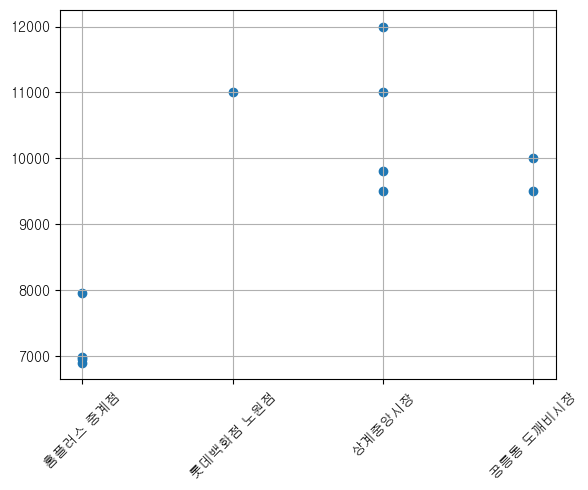

In [91]:
# 시각화
x = df_egg_2106_gu['시장/마트 이름']
y = df_egg_2106_gu['가격(원)']
plt.scatter(x, y)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 마트 지점별 달걀 가격

In [ ]:
# 마트 지점별 달걀 가격

In [ ]:
# 시각화